# Importing Libraries

In [26]:
#Loading required packages and libraries for data analysis
import numpy as np
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing

# Importing the dataset

In [27]:
#importing the datasets
train= pd.read_csv('Test-Data-10.csv')

include = ['Age', 'Gender', 'Religon', 'Race', 'Nature Of Occupation' ,
           'Civil Status' ,'Education Level' ,'Reason' ,'Lifetime Psychiatric Hospitalizations' ,
           'Past Suicide Attempts' ,'Any suicidal thoughts mentioned' ,'Self-Injurious Behaviour' ,
           'Psychiatric Disorders' ,'Past Illnesses' ,'Alcohol/ drug Consumption','Anger',
           'Sleep Problem', 'Social Iscolation', 'Sad/ Weary' , 'Humilated', 'Not Suicide(0)/Suicide(1)']  # Except the year, all the features are taken 
train_df = train[include]

In [28]:
#look of the training data
train_df.head(10)

,Age,Gender,Religon,Race,Nature Of Occupation,Civil Status,Education Level,Reason,Lifetime Psychiatric Hospitalizations,Past Suicide Attempts,...,Self-Injurious Behaviour,Psychiatric Disorders,Past Illnesses,Alcohol/ drug Consumption,Anger,Sleep Problem,Social Iscolation,Sad/ Weary,Humilated,Not Suicide(0)/Suicide(1)
0,30,F,Islam,Muslim,Administrative Executive Managerial & related ...,Unmarried,From Grade 1 to 7,Asthma,0,0,...,0,None,Asthma,None,0,0,0,0,0,0
1,91,F,Islam,Muslim,Sales worker,Married,University Degree or above,Alzheimer's disease,0,0,...,0,None,Other,None,0,1,0,0,0,0
2,85,M,Islam,Muslim,Security Personnel,Married,University Degree or above,Stroke/Chronic diseases & Physical disabilities,0,0,...,0,None,Diabetes,None,0,1,0,0,0,0
3,87,M,Christian,Sinhalese,Unemployed persons,Married,School not attended,Harrasment by the husband & family disputes,1,1,...,0,None,Chronic pain,Frequent,1,1,1,1,1,1
4,59,M,Islam,Muslim,Pensioners,Unmarried,Other,Alzheimer's disease,0,1,...,0,None,COPD,None,0,1,0,1,1,0
5,31,M,Other,Sinhalese,Agricultural Animal Husbandry Fisherman & rela...,Unmarried,Passed G.C.E (O/L),Harrasment by the husband & family disputes,1,1,...,1,None,Other,Frequent,1,1,1,1,1,1
6,75,M,Christian,Burger,Armed Services,Married,Passed G.C.E (A/L),Natural Death,0,0,...,0,None,Unknown,None,0,0,0,0,0,0
7,47,M,Buddhist,Sinhalese,Unemployed persons,Married,School not attended,Harrasment by the husband & family disputes,1,1,...,1,None,Other,Moderate,0,0,1,1,0,1
8,58,M,Christian,Burger,Armed Services,Unmarried,University Degree or above,Diabetes,0,0,...,0,None,Unknown,None,0,0,0,0,0,0
9,36,M,Hindu,Tamil,Armed Services,Married,University Degree or above,Natural Death,0,0,...,0,None,Unknown,None,0,1,0,0,0,0


In [29]:
#kind of data we have to work with
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Age                                    1000 non-null   int64 
 1   Gender                                 1000 non-null   object
 2   Religon                                1000 non-null   object
 3   Race                                   1000 non-null   object
 4   Nature Of Occupation                   1000 non-null   object
 5   Civil Status                           1000 non-null   object
 6   Education Level                        1000 non-null   object
 7   Reason                                 1000 non-null   object
 8   Lifetime Psychiatric Hospitalizations  1000 non-null   int64 
 9   Past Suicide Attempts                  1000 non-null   int64 
 10  Any suicidal thoughts mentioned        1000 non-null   int64 
 11  Self-Injurious Beh

In [30]:
train_df.describe()

,Age,Lifetime Psychiatric Hospitalizations,Past Suicide Attempts,Any suicidal thoughts mentioned,Self-Injurious Behaviour,Anger,Sleep Problem,Social Iscolation,Sad/ Weary,Humilated,Not Suicide(0)/Suicide(1)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,51.820000,0.234000,0.172000,0.308000,0.226000,0.460000,0.621000,0.42500,0.404000,0.362000,0.50000
std,22.186704,0.423584,0.377569,0.461898,0.418448,0.498647,0.485381,0.49459,0.490943,0.480819,0.50025
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
25%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
50%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.50000
75%,70.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000
max,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000


In [31]:
train_df.describe(include='O')# not zero capital o

,Gender,Religon,Race,Nature Of Occupation,Civil Status,Education Level,Reason,Psychiatric Disorders,Past Illnesses,Alcohol/ drug Consumption
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,2,5,5,14,4,7,23,7,10,3
top,M,Buddhist,Sinhalese,Unemployed persons,Married,Passed Grade 8,Natural Death,None,Unknown,None
freq,688,825,843,224,618,234,177,691,368,708


In [32]:
#finding the percentage of missing values in train dataset
train_df.isnull().sum() /len(train_df)*100

Age                                      0.0
Gender                                   0.0
Religon                                  0.0
Race                                     0.0
Nature Of Occupation                     0.0
Civil Status                             0.0
Education Level                          0.0
Reason                                   0.0
Lifetime Psychiatric Hospitalizations    0.0
Past Suicide Attempts                    0.0
Any suicidal thoughts mentioned          0.0
Self-Injurious Behaviour                 0.0
Psychiatric Disorders                    0.0
Past Illnesses                           0.0
Alcohol/ drug Consumption                0.0
Anger                                    0.0
Sleep Problem                            0.0
Social Iscolation                        0.0
Sad/ Weary                               0.0
Humilated                                0.0
Not Suicide(0)/Suicide(1)                0.0
dtype: float64

M    688
F    312
Name: Gender, dtype: int64

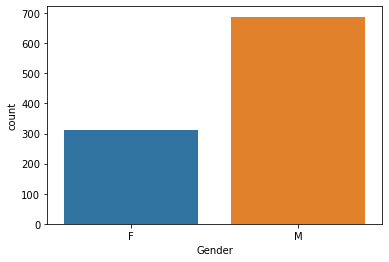

In [33]:
#count of  Gender
sns.countplot('Gender',data=train_df)
train_df['Gender'].value_counts()

Buddhist     825
Islam         61
Hindu         53
Christian     31
Other         30
Name: Religon, dtype: int64

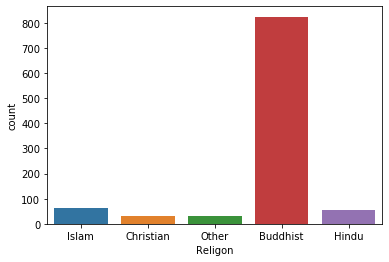

In [34]:
#count of Religon
sns.countplot('Religon',data=train_df)
train_df['Religon'].value_counts()

Sinhalese     843
Muslim         61
Tamil          53
Burger         25
Other          18
Name: Race, dtype: int64

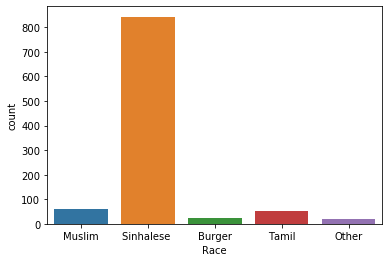

In [35]:
#count of Race
sns.countplot('Race',data=train_df)
train_df['Race'].value_counts()

Unemployed persons                                                                                           224
Agricultural Animal Husbandry Fisherman & related Forestry workers                                           108
Pensioners                                                                                                    84
Student                                                                                                       82
Administrative Executive Managerial & related workers                                                         68
Production process workers Craftsman & related workers transport equipment operators & labourers              61
Clerical & related workers (Stenographers/ Typists etc)                                                       59
Security Personnel                                                                                            58
Service workers (Cooks/Tailors/Barbers/ etc)                                                    

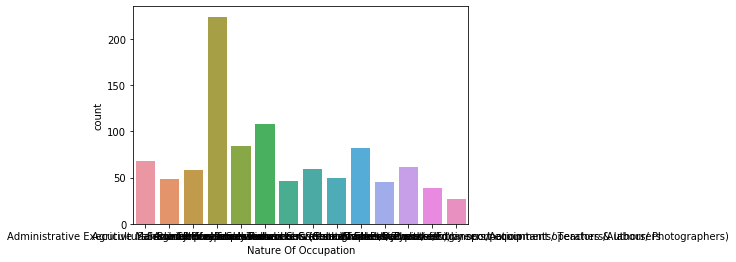

In [36]:
#count of Occupation
sns.countplot('Nature Of Occupation',data=train_df)
train_df['Nature Of Occupation'].value_counts()

Married      618
Unmarried    333
Divourced     25
Widow         24
Name: Civil Status, dtype: int64

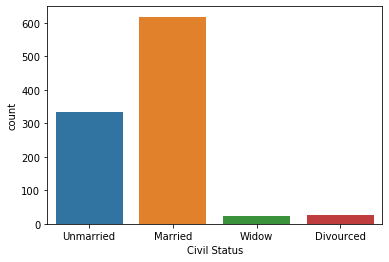

In [37]:
#count of Civil status
sns.countplot('Civil Status',data=train_df)
train_df['Civil Status'].value_counts()

In [38]:
Suicide = train_df[train_df['Not Suicide(0)/Suicide(1)'] == 1]
not_Suicide = train_df[train_df['Not Suicide(0)/Suicide(1)'] == 0]

print ("Suicide: %i (%.1f%%)"%(len(Suicide), float(len(Suicide))/len(train_df)*100.0))
print ("Not Suicide: %i (%.1f%%)"%(len(not_Suicide), float(len(not_Suicide))/len(train_df)*100.0))
print ("Total: %i"%len(train_df))

Suicide: 500 (50.0%)
Not Suicide: 500 (50.0%)
Total: 1000


In [39]:
train_df.Religon.value_counts()

Buddhist     825
Islam         61
Hindu         53
Christian     31
Other         30
Name: Religon, dtype: int64

# Gender and Suicide

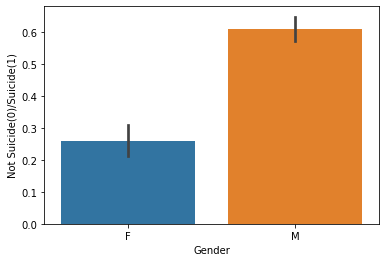

In [40]:
train_df.Gender.value_counts()
train_df[['Gender', 'Not Suicide(0)/Suicide(1)']].groupby(['Gender'], as_index=False).mean()

#train.groupby('Sex').Survived.mean().plot(kind='bar')
sns.barplot(x='Gender', y='Not Suicide(0)/Suicide(1)', data=train_df)

# Anger and Suicide 

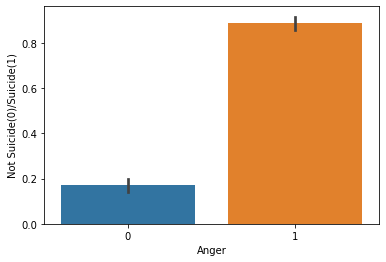

In [41]:
train_df.Gender.value_counts()
train_df[['Anger', 'Not Suicide(0)/Suicide(1)']].groupby(['Anger'], as_index=False).mean()
sns.barplot(x='Anger', y='Not Suicide(0)/Suicide(1)', data=train_df)

# Religon and Suicide

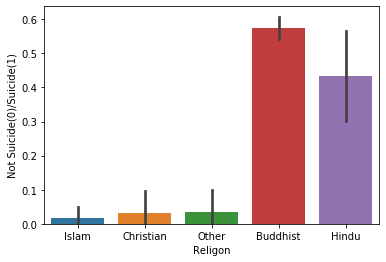

In [42]:
train_df.Gender.value_counts()
train_df[['Religon', 'Not Suicide(0)/Suicide(1)']].groupby(['Religon'], as_index=False).mean()
sns.barplot(x='Religon', y='Not Suicide(0)/Suicide(1)', data=train_df)

In [43]:
# Race and Suicide 

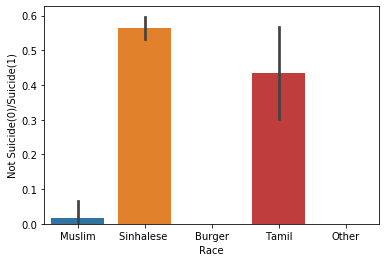

In [44]:
train_df.Gender.value_counts()
train_df[['Race', 'Not Suicide(0)/Suicide(1)']].groupby(['Race'], as_index=False).mean()
sns.barplot(x='Race', y='Not Suicide(0)/Suicide(1)', data=train_df)

train_df[['Sleep Problem', 'Not Suicide(0)/Suicide(1)']].groupby(['Sleep Problem'], as_index=False).mean()

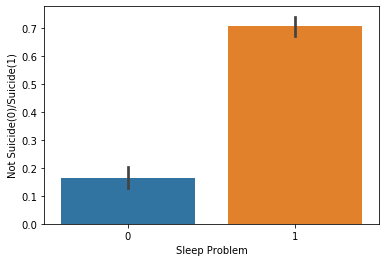

In [45]:
sns.barplot(x='Sleep Problem', y='Not Suicide(0)/Suicide(1)', data=train_df)

In [46]:
# Occupation and Suicide 

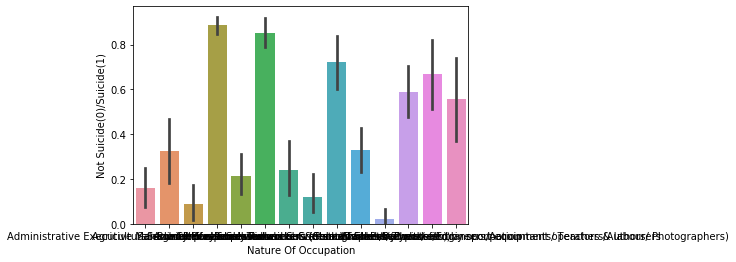

In [47]:
sns.barplot(x='Nature Of Occupation', y='Not Suicide(0)/Suicide(1)', data=train_df)

# Civil Status and Suicide 